In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
np,plt,sns

(<module 'numpy' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>,
 <module 'matplotlib.pyplot' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <module 'seaborn' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>)

In [3]:
datasetcars = pd.read_csv('data/cars.csv')

In [4]:
datasetcars.drop(['Car', 'Model'], axis=1, inplace=True)

In [5]:
X = datasetcars.iloc[:, :-1].values
y = datasetcars.iloc[:, -1].values

In [6]:
datasetcars

,Volume,Weight,CO2
0,1000,790,99
1,1200,1160,95
2,1000,929,95
3,900,865,90
4,1500,1140,105
5,1000,929,105
6,1400,1109,90
7,1500,1365,92
8,1500,1112,98
9,1600,1150,99


In [7]:
class LinearRegression:
    def __init__(self, lr = 0.00000001, n_iters=5000):
        self.lr = lr
        self.n_iters = n_iters
        self.wights = None
        self.bais= None

    def fit(self,X,y):
        n_samples, n_features = X.shape
        self.wights = np.zeros(n_features)
        self.bais = 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.wights)+self.bais
            # gradient
            dw = (2/n_samples)*np.dot(X.T,(y_pred-y))
            db = (2/n_samples)*np.sum((y_pred-y))
            # update
            self.wights = self.wights - self.lr * dw
            self.bais = self.bais - self.lr * db
    def predict(self,X):
        y_preds = np.dot(X, self.wights) + self.bais
        return y_preds

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [9]:
def MSE(y_pred,y_true):
    mse = np.mean((y_pred-y_true)**2)
    return mse

In [10]:
regrssor = LinearRegression(lr=0.00000001, n_iters=5000)
regrssor.fit(X_train,y_train)

In [11]:
y_pred = regrssor.predict(X_test)

In [12]:
MSE(y_pred,y_test)

33.379236905143394

In [13]:
print(regrssor.bais)
# 0.0003402677805040269

0.00033506326845452676


In [14]:
print(regrssor.wights)
# [0.01121652 0.06298495]

[0.01215959 0.06197751]


In [15]:
from sklearn.linear_model import LinearRegression
skreg = LinearRegression()
skreg.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = skreg.predict(X_test)

In [17]:
MSE(y_pred,y_test)

41.32891343446535

### 2nd Data

In [18]:
data = pd.read_csv('data/data.csv')

In [19]:
data

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [20]:
X_n = data.iloc[:,1:2].values
y_n = data.iloc[:,2].values

In [21]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_n,y_n,test_size=)

In [22]:
skreg.fit(X_n,y_n)

LinearRegression()

In [23]:
y_npred = skreg.predict(X_n)

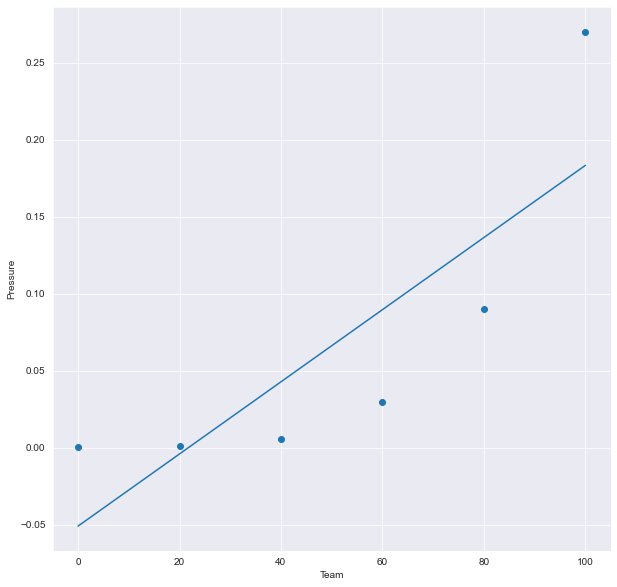

In [24]:
# Visualize Data
plt.figure(figsize=(10,10))
plt.scatter(X_n,y_n)
plt.plot(X_n,y_npred)
plt.xlabel('Team')
plt.ylabel('Pressure')
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=4)
X_pol=pol.fit_transform(X_n)
X_pol.shape

(6, 5)

In [26]:
skreg.fit(X_pol,y_n)

LinearRegression()

In [27]:
y_npredn = skreg.predict(X_pol)

In [28]:
y_npredn

array([ 4.61111118e-04, -1.05555554e-04,  8.61111111e-03,  2.73888889e-02,
        9.13055556e-02,  2.69738889e-01])

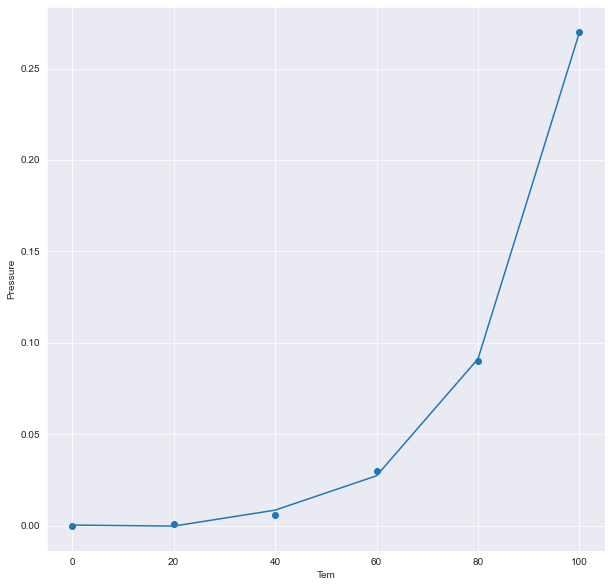

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(X_n,y_n)
plt.plot(X_n,y_npredn)
plt.xlabel('Tem')
plt.ylabel('Pressure')
plt.show()